# File to work in and test few stuff

In [110]:
import numpy as np
import matplotlib.pyplot as plt


n_nucleo = 10
s_nucleo = 15

n_linker = n_nucleo + 1
s_linker = 5

s_shift = 1

def alpha_diffused(
    n_nucleo: int,
    s_nucleo: int,
    n_linker: int,
    s_linker: int,
    s_shift: int,
    alphaf: float,
    alphao: float
) -> np.ndarray :
    """Generate a 1D alpha profile representing a chromatin fiber composed of nucleosomes and linkers,
    with random diffusion (shifts) of linker regions around nucleosomes.

    Args:
        n_nucleo (int): Number of nucleosomes.
        s_nucleo (int): Size (in base pairs) of each nucleosome.
        n_linker (int): Number of linker regions (typically n_nucleo - 1).
        s_linker (int): Size (in base pairs) of each linker region.
        s_shift (int): Maximum extent (in bp) of the fuzzy linker region on each side of a nucleosome.
                       Must satisfy s_shift ≤ s_linker // 2 to prevent overlapping.
        alphaf (float): Alpha value assigned to fuzzy (linker) regions.
        alphao (float): Alpha value assigned to ordered (nucleosome) regions.

    Returns:
        np.ndarray | None: The resulting 1D alpha profile, or None if the given s_shift is too large.
    
    Notes:
        - The base profile alternates between linker and nucleosome regions with fixed periodicity.
        - Each nucleosome is randomly assigned a side (left or right) where additional linker fuzziness is applied.
        - The final profile is plotted: initial in blue, diffused in red.
    """
    
    if s_shift > s_linker // 2:
        print("No such s_shift value permitted because of possible entanglement")
        return None

    # Random shifts: -1 (right) or 1 (left) for each nucleosome
    # Construct the initial periodic alpha profile
    shifts = np.random.choice([-1, 1], size=n_nucleo, p=[0.5, 0.5])
    s_period = s_linker + s_nucleo
    shifted = np.array(
        (s_linker * [alphaf] + s_nucleo * [alphao]) * n_nucleo + s_linker * [alphaf],
        dtype=float
    )

    # Apply diffusion around each nucleosome
    for i in range(n_nucleo):
        nucleo_start = s_linker + i * s_period
        shifted[nucleo_start - s_shift : nucleo_start + s_nucleo + s_shift] = alphao

        if shifts[i] == 1:
            # Fuzzy region to the left
            shifted[nucleo_start - s_shift : nucleo_start + s_shift] = alphaf
        else:
            # Fuzzy region to the right
            shifted[nucleo_start - s_shift + s_nucleo : nucleo_start + s_shift + s_nucleo] = alphaf

    return shifted


alpha_diffused(n_nucleo, s_nucleo, n_linker, s_linker, s_shift, 1, 0)

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1.])

In [122]:
from typing import Tuple
import matplotlib.pyplot as plt


def calculate_distribution(
    data: np.ndarray, 
    first_bin: float, 
    last_bin: float, 
    bin_width: float
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calculate the normalized distribution of data using a histogram.

    Args:
        data (np.ndarray): Array of data values to compute the distribution for.
        first_bin (float): Lower bound of the first bin.
        last_bin (float): Upper bound of the last bin.
        bin_width (float): Width of each bin.

    Returns:
        Tuple[np.ndarray, np.ndarray]:
            - points (np.ndarray): Array of bin centers.
            - distrib (np.ndarray): Normalized distribution (sum equals 1).
    """

    # Handle empty data array
    if data.size == 0: 
        return np.array([]), np.array([])

    # Points and not bins
    bins_array = np.arange(first_bin, int(last_bin) + bin_width, bin_width)
    distrib, bins_edges = np.histogram(data, bins=bins_array)

    # Normalizing without generating NaNs
    if np.sum(distrib) > 0:
        distrib = distrib / np.sum(distrib)
    else:
        distrib = np.zeros_like(distrib)

    points = (bins_edges[:-1] + bins_edges[1:]) / 2

    # Return the bin centers and the normalized distribution
    return points, distrib

# Forwards and Reverses

# 2nd method : correct

In [105]:
# Forward step dwell times were measured as the time between two consecutive forward steps : ONLY CONSECUTIVE ONES !!
# Reverse step dwell times were measured as the time between a reverse step and the preceding forward step : ONLY THE PRECEDING FORWARD ONE
# STEPS NOT JUMPS !!

Mettre sous forme de fonctions

En appelant au départ listsoflist_into_matrix

Puis appliquer ça de sorte à avoir un remplissage propre de l'ensemble des temps

Pour ensuite envoyer tout dans calculate distribution

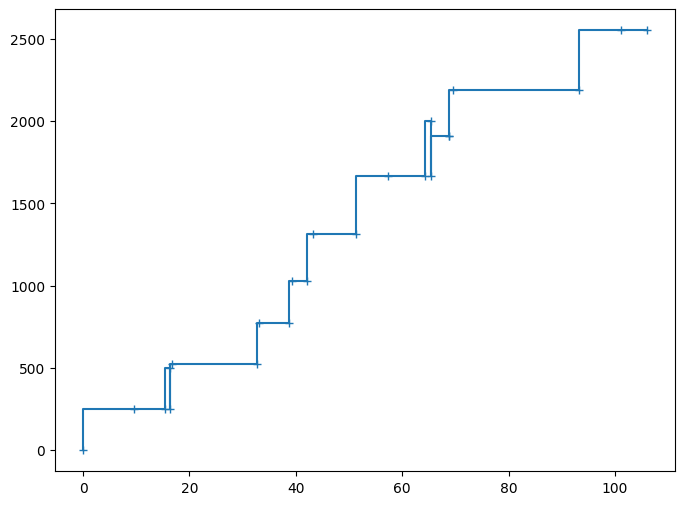

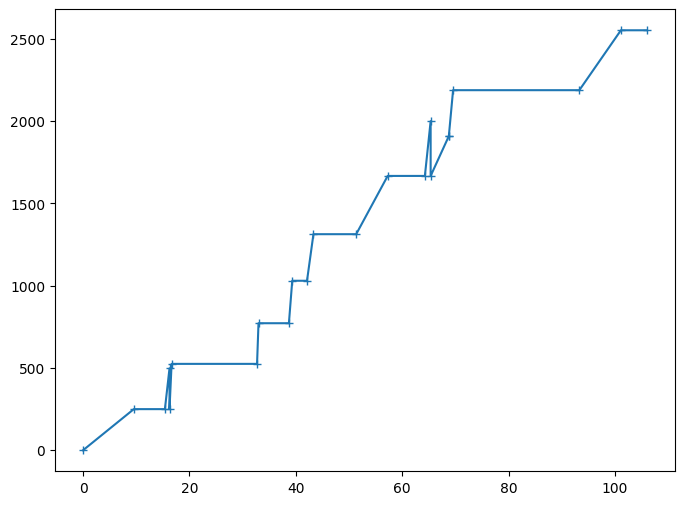

In [212]:
import numpy as np
import matplotlib.pyplot as plt

positions = np.array([[
    0, 250, 250, 498, 250, 525, 525, 772, 772, 1030, 1030,
    1313, 1313, 1667, 1667, 2000, 1667, 1907, 1907, 2188,
    2188, 2552, 2552
]], dtype=np.int64)

times = np.array([[
    0.0, 9.547052740320428, 15.393154725908442, 16.259802266437823,
    16.259802266437823, 16.651642630168624, 32.718111658778426,
    32.99108381610351, 38.707036866731336, 39.33370018198628,
    42.10984250618984, 43.31919643429255, 51.356615866059244,
    57.27641719748995, 64.2714662830563, 65.35495885275758,
    65.35495885275758, 68.74894407655424, 68.76929732373166,
    69.57339452178307, 93.30892590706453, 101.12297124196891,
    105.96930516766943
]], dtype=np.float64)


plt.figure(figsize=(8,6))
plt.step(times[0], positions[0], marker="+")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(times[0], positions[0], marker="+")
plt.show()

In [213]:
# getting the pairs and odds

print(times, "\n\n")
times_pair = times[:, 0::2]
times_odd = times[:, 1::2]
print(times_pair, "\n\n", times_odd)

[[  0.           9.54705274  15.39315473  16.25980227  16.25980227
   16.65164263  32.71811166  32.99108382  38.70703687  39.33370018
   42.10984251  43.31919643  51.35661587  57.2764172   64.27146628
   65.35495885  65.35495885  68.74894408  68.76929732  69.57339452
   93.30892591 101.12297124 105.96930517]] 


[[  0.          15.39315473  16.25980227  32.71811166  38.70703687
   42.10984251  51.35661587  64.27146628  65.35495885  68.76929732
   93.30892591 105.96930517]] 

 [[  9.54705274  16.25980227  16.65164263  32.99108382  39.33370018
   43.31919643  57.2764172   65.35495885  68.74894408  69.57339452
  101.12297124]]


In [214]:
# Idenfications des sauts reverses et forwards
# False = saut reverse
# Tre = saut forward

positions_pair = positions[:, 0::2]
mask_matrix = np.zeros_like(positions_pair, dtype=bool)

jump_matrix = (positions_pair[:, :-1] < positions_pair[:, 1:])
print(jump_matrix)

[[ True False  True  True  True  True  True False  True  True  True]]


In [215]:
# On veut les temps entre ces evenemnts

print(times, "\n\n", times[:, 1::2], "\n\n", times[:, 0::2], "\n\n", np.diff(times, axis=1))

[[  0.           9.54705274  15.39315473  16.25980227  16.25980227
   16.65164263  32.71811166  32.99108382  38.70703687  39.33370018
   42.10984251  43.31919643  51.35661587  57.2764172   64.27146628
   65.35495885  65.35495885  68.74894408  68.76929732  69.57339452
   93.30892591 101.12297124 105.96930517]] 

 [[  9.54705274  16.25980227  16.65164263  32.99108382  39.33370018
   43.31919643  57.2764172   65.35495885  68.74894408  69.57339452
  101.12297124]] 

 [[  0.          15.39315473  16.25980227  32.71811166  38.70703687
   42.10984251  51.35661587  64.27146628  65.35495885  68.76929732
   93.30892591 105.96930517]] 

 [[9.54705274e+00 5.84610199e+00 8.66647541e-01 0.00000000e+00
  3.91840364e-01 1.60664690e+01 2.72972157e-01 5.71595305e+00
  6.26663315e-01 2.77614232e+00 1.20935393e+00 8.03741943e+00
  5.91980133e+00 6.99504909e+00 1.08349257e+00 0.00000000e+00
  3.39398522e+00 2.03532472e-02 8.04097198e-01 2.37355314e+01
  7.81404533e+00 4.84633393e+00]]


In [216]:
# reverses
# temps non cumulées
# 2.41756433 - 0
# 2.55733065 - 2.41756433
# 22.90792872 - 17.53642436
# 36.57052213 - 22.90792872 
# 53.87713567 - 47.09245808
# 56.41896674 - 53.87713567

t_diff = np.diff(times, axis=1)
print(t_diff)

[[9.54705274e+00 5.84610199e+00 8.66647541e-01 0.00000000e+00
  3.91840364e-01 1.60664690e+01 2.72972157e-01 5.71595305e+00
  6.26663315e-01 2.77614232e+00 1.20935393e+00 8.03741943e+00
  5.91980133e+00 6.99504909e+00 1.08349257e+00 0.00000000e+00
  3.39398522e+00 2.03532472e-02 8.04097198e-01 2.37355314e+01
  7.81404533e+00 4.84633393e+00]]


In [217]:
# Reverses : should be fine after verification
# Explanations here :

mask_next_is_zero = (t_diff[:, 1:] == 0.)
# print(mask_next_is_zero)
          
time_reverses = t_diff[:, :-1][mask_next_is_zero]
print(time_reverses)

[0.86664754 1.08349257]


In [219]:
# Forwards
# Explanations here : couples of True because it is the difference of times between two consecutive True events

# You only need the times of the end of the events
print(times)
time_of_event = np.diff(times[:, 0::2], axis=1)
print(time_of_event)
# GOOD !

# Finds the nature of jumps : False = Rejected ; True = Accepted
positions_pair = positions[:, 0::2]
mask_matrix = np.zeros_like(positions_pair, dtype=bool)
jump_matrix = (positions_pair[:, :-1] < positions_pair[:, 1:])
print(jump_matrix)

# You want to keep the times where there is two consective accepted
time_selected = jump_matrix * time_of_event
print(time_selected)
# On a là toutes les durées des evenemnts de forward
# On garde que les consécutifs, donc ceux qui n'ont pas un 0 avant eux

mask_consecutive = (time_selected[:,:-1] != 0.) & (time_selected[:, 1:] != 0)
print(mask_consecutive)

time_forwards = time_selected[:, 1:] * mask_consecutive
time_forwards_cleaned = time_forwards[time_forwards != 0]
print(time_forwards_cleaned)



# Faut vraiment que je détaille absolument tout sinon c'est incompréhensible

[[  0.           9.54705274  15.39315473  16.25980227  16.25980227
   16.65164263  32.71811166  32.99108382  38.70703687  39.33370018
   42.10984251  43.31919643  51.35661587  57.2764172   64.27146628
   65.35495885  65.35495885  68.74894408  68.76929732  69.57339452
   93.30892591 101.12297124 105.96930517]]
[[15.39315473  0.86664754 16.45830939  5.98892521  3.40280564  9.24677336
  12.91485042  1.08349257  3.41433847 24.53962858 12.66037926]]
[[ True False  True  True  True  True  True False  True  True  True]]
[[15.39315473  0.         16.45830939  5.98892521  3.40280564  9.24677336
  12.91485042  0.          3.41433847 24.53962858 12.66037926]]
[[False False  True  True  True  True False False  True  True]]
[ 5.98892521  3.40280564  9.24677336 12.91485042 24.53962858 12.66037926]


# 1ft method : wrong

In [ ]:
import numpy as np

x = np.array([[0, 3, 0, 5, 0, 2, 2, 7, 2, 5, 5],
              [0, 5, 5, 7, 7, 9, 7, np.nan, np.nan, np.nan, np.nan],
              [0, 4, 4, 7, 7, 9, 9, 7, 9, np.nan, np.nan]])

tc = np.array([[0, 0.22, 0.31, 0.47, 1.20, 1.25, 3.21, 3.56, 4.55, 5.12, 6.12],
              [0, 0.45, 0.55, 0.88, 2.22, 3.12, 3.55, np.nan, np.nan, np.nan, np.nan],
              [0, 0.12, 0.44, 0.76, 0.79, 2.13, 2.55, 4.17, 5.13, np.nan, np.nan]])

t = np.diff(tc, axis=1)

print(x, "\n\n", tc, "\n\n", t)

In [ ]:
# mask = np.zeros_like(positions, dtype=bool)
# equal_next = (positions[:, :-1] == positions[:, 1:])

# mask[:, :-1] |= equal_next
# mask[:,  1:] |= equal_next

# print(mask[:, 0::2], "\n\n", mask[:, 1::2])

In [106]:
# # Forward jumps
# mask_forward = np.zeros_like(x, dtype=bool)
# for i in range(len(x)):
#     for j in range (len(x[i])-1):
#         if x[i][j] == x[i][j+1]:
#             # mask[i][j] = True
#             mask_forward[i][j+1] = 1
# print(mask_forward)

# # Reverse jumps
# mask_reverse = np.zeros_like(x, dtype=bool)
# for i in range(len(x)):
#     for j in range (len(x[i])-1):
#         if x[i][j] != x[i][j+1]:
#             # mask[i][j] = True
#             mask_reverse[i][j+1] = 1
# print(mask_reverse)

# mask_rever = ~mask_forward
# print(mask_rever)print(array)


In [109]:
def getting_forwards(x_matrix, t_matrix):

    # Rajouter les listoflist in matrix

    mask = np.zeros_like(x_matrix, dtype=bool)
    matches = (x[:, :-1] == x[:, 1:])
    mask[:, 1:] = matches

    array = mask * t_matrix
    result = np.concatenate([
        np.insert(row[(row != 0 ) & ~np.isnan(row)], 0, 0)
        for row in array
    ])

    diff = np.diff(result)
    frwd_times = diff[diff > 0]

    return frwd_times


print(x, "\n\n", tc, "\n\n", getting_forwards(x, tc))

[[ 0.  3.  0.  5.  0.  2.  2.  7.  2.  5.  5.]
 [ 0.  5.  5.  7.  7.  9.  7. nan nan nan nan]
 [ 0.  4.  4.  7.  4.  9.  4.  7.  7. nan nan]] 

 [[0.   0.22 0.31 0.47 1.2  1.25 3.21 3.56 4.55 5.12 6.12]
 [0.   0.45 0.55 0.88 2.22 3.12 3.55  nan  nan  nan  nan]
 [0.   0.12 0.44 0.76 0.79 2.13 2.55 4.17 5.13  nan  nan]] 

 [3.21 2.91 0.55 1.67 0.44 4.69]


In [49]:
# gettingreverses

print(x)
print(tc)
our_times = tc[:, 0::2]
print("\n", our_times, "\n")

mask = np.zeros_like(x, dtype=bool)
matches = (x[:, :-1] == x[:, 1:])
mask[:, 1:] = matches
filter = mask[:, 0::2]
print(filter)

# result = np.concatenate([
#     np.diff([])
# ])

dwell = []

for i in range (len(filter)):
    for j in range(len(filter[0])):
        if filter[i][j] == False:
            false_value = our_times[i][j]
        if filter[i][j] == True:
            dwell.append(our_times[i][j] - false_value)
print(dwell)



[[ 0.  3.  0.  5.  0.  2.  2.  7.  2.  5.  5.]
 [ 0.  5.  5.  7.  7.  9.  7. nan nan nan nan]
 [ 0.  4.  4.  7.  4.  9.  4.  7.  7. nan nan]]
[[0.   0.22 0.31 0.47 1.2  1.25 3.21 3.56 4.55 5.12 6.12]
 [0.   0.45 0.55 0.88 2.22 3.12 3.55  nan  nan  nan  nan]
 [0.   0.12 0.44 0.76 0.79 2.13 2.55 4.17 5.13  nan  nan]]

 [[0.   0.31 1.2  3.21 4.55 6.12]
 [0.   0.55 2.22 3.55  nan  nan]
 [0.   0.44 0.79 2.55 5.13  nan]] 

[[False False False  True False  True]
 [False  True  True False False False]
 [False  True False False  True False]]
[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


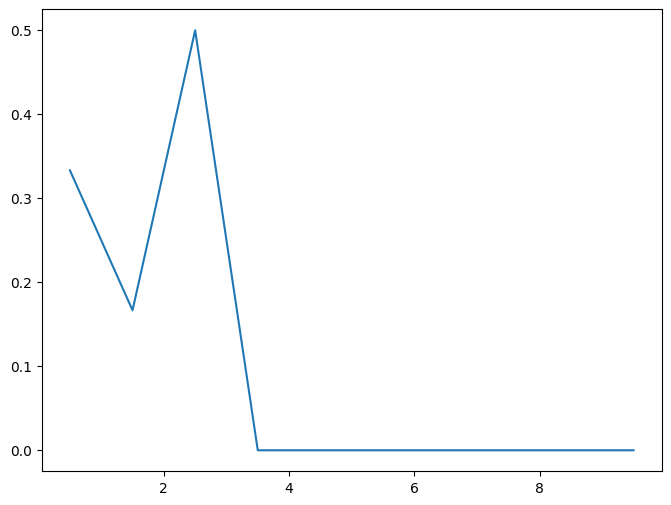

In [48]:
def getting_reverses(t_matrix: np.ndarray, x_matrix: np.ndarray, first_bin: int, last_bin: int, bin_width: float) -> np.ndarray:

    # Rajouter les listoflist in matrix
    times = t_matrix[:, 0::2]

    mask = np.zeros_like(x_matrix, dtype=bool)
    matches = (x[:, :-1] == x[:, 1:])
    mask[:, 1:] = matches
    filter = mask[:, 0::2]

    dwell = []

    for i in range (len(filter)):
        for j in range(len(filter[0])):
            if filter[i][j] == False:
                false_value = times[i][j]
            if filter[i][j] == True:
                dwell.append(times[i][j] - false_value)
    print(dwell)

    points, distrib_reverses = calculate_distribution(np.array(dwell), first_bin, last_bin, bin_width)
    return points, distrib_reverses

x_points, y_points = getting_reverses(tc, x, first_bin=0, last_bin=10, bin_width=1)

plt.figure(figsize=(8,6))
plt.plot(x_points, y_points)
plt.show()

In [32]:
# # Sous forme numpy


# dwell = []
# for row_filter, row_times in zip(filter, our_times):
#     # indices des False
#     false_mask = ~row_filter
#     # dernier False avant chaque position
#     last_false = np.maximum.accumulate(row_times * false_mask)
#     # différences seulement aux True
#     dwell.extend((row_times - last_false)[row_filter])
# print(dwell)

[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


In [100]:
mask = np.zeros_like(x, dtype=bool)
equal_next = (x[:, :-1] == x[:, 1:])

mask[:, :-1] |= equal_next
mask[:,  1:] |= equal_next

print(mask)

[[False False False False False  True  True False False  True  True]
 [False  True  True  True  True False False False False False False]
 [False False False False False False False  True  True False False]]


In [53]:
print(x)

def calculate_distribution_of_jump_size(matrix_x: np.ndarray, first_bin: int, last_bin: int, bin_width: float) ->Tuple[np.ndarray, np.ndarray]:

    data = np.diff(matrix_x, axis=1)
    points, distribution = calculate_distribution(data, first_bin, last_bin, bin_width)

    return points, distribution

print(int(np.nanmax(x)))
calculate_distribution_of_jump_size(x, 0, 8, 1)
# int(np.nanmax(x))

[[ 0.  3.  0.  5.  0.  2.  2.  7.  2.  5.  5.]
 [ 0.  5.  5.  7.  7.  9.  7. nan nan nan nan]
 [ 0.  4.  4.  7.  4.  9.  4.  7.  7. nan nan]]
9


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 array([0.33333333, 0.        , 0.16666667, 0.22222222, 0.05555556,
        0.22222222, 0.        , 0.        ]))

# Mapping

In [85]:
# Librairies
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import fastparquet as fp
import pyarrow.parquet as pq
from dataclasses import dataclass
from typing import List


# Datas
@dataclass
class SimulationParams:
    """Container for physical simulation parameters."""
    rtot_bind: float
    rtot_rest: float


# Files
base_path = "/home/nicolas/Documents/Workspace/nucleo/outputs/ncl_map_0"

df_pl_tau = pl.DataFrame()

# Exploration récursive
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".parquet"):
            full_path = os.path.join(root, file)
            try:
                df = pl.read_parquet(full_path)
                # print(df)

                if all(col in df.columns for col in ["lmbda", "rtot_bind", "rtot_rest", "tau_forwards", "tau_reverses"]):
                    df_selected = df.select(["lmbda", "rtot_bind", "rtot_rest", "tau_forwards", "tau_reverses"])
                    df_pl_tau = pl.concat([df_pl_tau, df_selected])
            except Exception as e:
                print(f"Erreur avec {full_path} : {e}")

print(df_pl_tau)

shape: (40_000, 5)
┌───────┬───────────┬───────────┬──────────────┬──────────────┐
│ lmbda ┆ rtot_bind ┆ rtot_rest ┆ tau_forwards ┆ tau_reverses │
│ ---   ┆ ---       ┆ ---       ┆ ---          ┆ ---          │
│ f64   ┆ f64       ┆ f64       ┆ f64          ┆ f64          │
╞═══════╪═══════════╪═══════════╪══════════════╪══════════════╡
│ 0.1   ┆ 0.114372  ┆ 0.054973  ┆ 24.114785    ┆ 206.103055   │
│ 0.7   ┆ 0.069581  ┆ 0.05      ┆ 77.288617    ┆ 38.19688     │
│ 0.1   ┆ 0.904936  ┆ 0.083615  ┆ 13.954115    ┆ 81.243129    │
│ 0.3   ┆ 0.092993  ┆ 0.231417  ┆ 17.953349    ┆ 35.758568    │
│ 0.5   ┆ 0.074813  ┆ 0.079601  ┆ 37.471512    ┆ 40.948199    │
│ …     ┆ …         ┆ …         ┆ …            ┆ …            │
│ 0.1   ┆ 0.114372  ┆ 0.52381   ┆ 11.008676    ┆ 68.712216    │
│ 0.3   ┆ 0.211719  ┆ 0.321012  ┆ 10.276219    ┆ 20.193533    │
│ 0.7   ┆ 0.163124  ┆ 0.080896  ┆ 38.244733    ┆ 20.028599    │
│ 0.7   ┆ 0.180921  ┆ 3.322148  ┆ 16.949404    ┆ 7.870268     │
│ 0.3   ┆ 0.109344  ┆

shape: (40_000, 5)
┌───────┬───────────┬───────────┬──────────────┬──────────────┐
│ lmbda ┆ rtot_bind ┆ rtot_rest ┆ tau_forwards ┆ tau_reverses │
│ ---   ┆ ---       ┆ ---       ┆ ---          ┆ ---          │
│ f64   ┆ f64       ┆ f64       ┆ f64          ┆ f64          │
╞═══════╪═══════════╪═══════════╪══════════════╪══════════════╡
│ 0.1   ┆ 0.114372  ┆ 0.054973  ┆ 24.114785    ┆ 206.103055   │
│ 0.7   ┆ 0.069581  ┆ 0.05      ┆ 77.288617    ┆ 38.19688     │
│ 0.1   ┆ 0.904936  ┆ 0.083615  ┆ 13.954115    ┆ 81.243129    │
│ 0.3   ┆ 0.092993  ┆ 0.231417  ┆ 17.953349    ┆ 35.758568    │
│ 0.5   ┆ 0.074813  ┆ 0.079601  ┆ 37.471512    ┆ 40.948199    │
│ …     ┆ …         ┆ …         ┆ …            ┆ …            │
│ 0.1   ┆ 0.114372  ┆ 0.52381   ┆ 11.008676    ┆ 68.712216    │
│ 0.3   ┆ 0.211719  ┆ 0.321012  ┆ 10.276219    ┆ 20.193533    │
│ 0.7   ┆ 0.163124  ┆ 0.080896  ┆ 38.244733    ┆ 20.028599    │
│ 0.7   ┆ 0.180921  ┆ 3.322148  ┆ 16.949404    ┆ 7.870268     │
│ 0.3   ┆ 0.109344  ┆

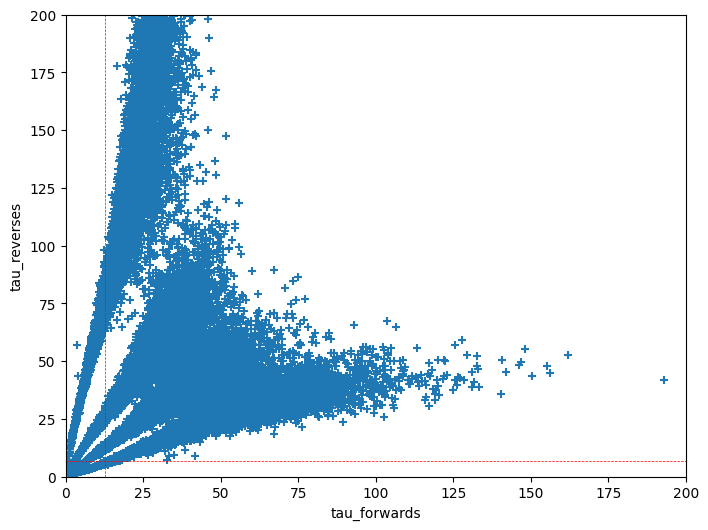

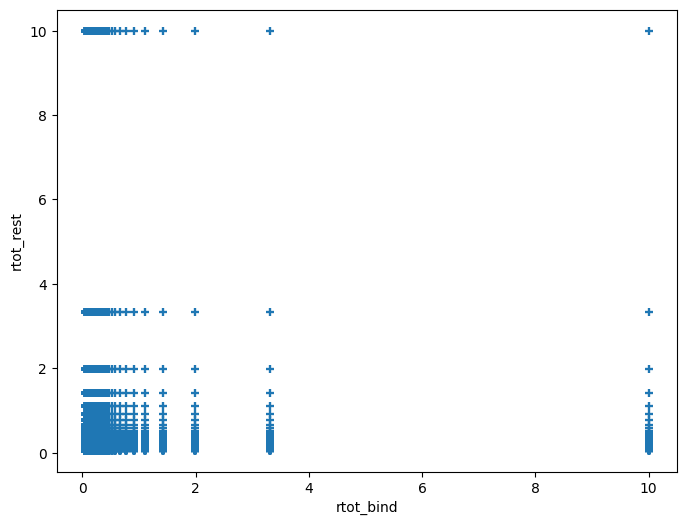

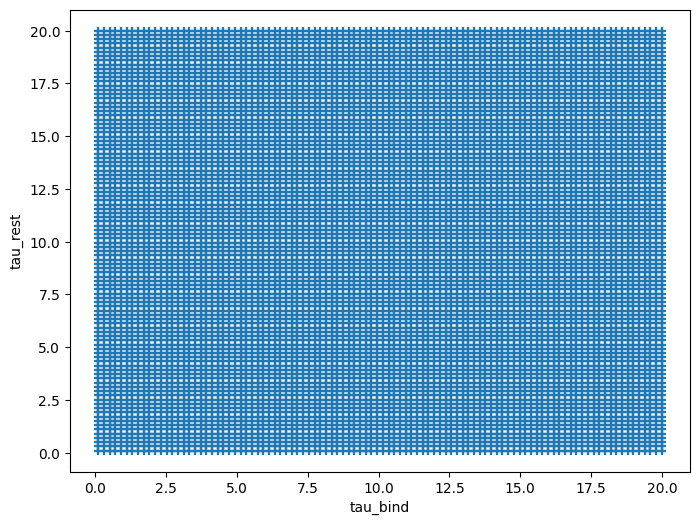

In [88]:
print(df_pl_tau)

plt.figure(figsize=(8,6))
plt.axvline(x=12.6, c="r", lw=0.5, ls="--")
plt.axhline(y=06.6, c="r", lw=0.5, ls="--")
plt.scatter(df_pl_tau["tau_forwards"], df_pl_tau["tau_reverses"], marker="+")
plt.xlabel("tau_forwards")
plt.ylabel("tau_reverses")
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(df_pl_tau["rtot_bind"], df_pl_tau["rtot_rest"], marker="+")
plt.xlabel("rtot_bind")
plt.ylabel("rtot_rest")
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(1/df_pl_tau["rtot_bind"], 1/df_pl_tau["rtot_rest"], marker="+")
plt.xlabel("tau_bind")
plt.ylabel("tau_rest")
plt.show()



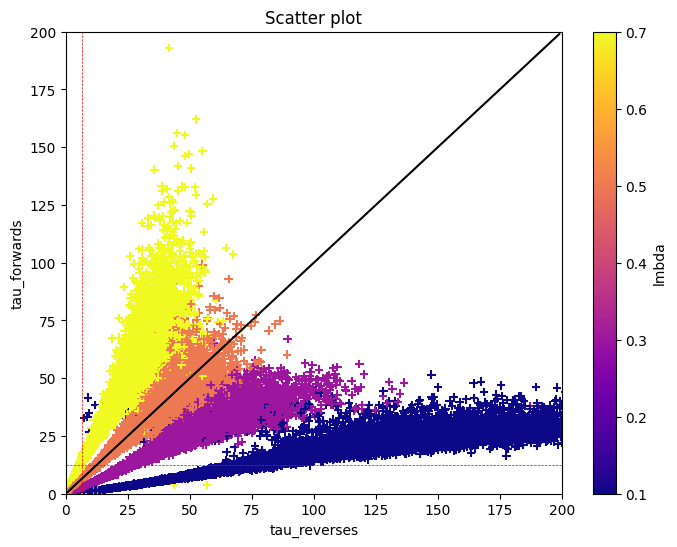

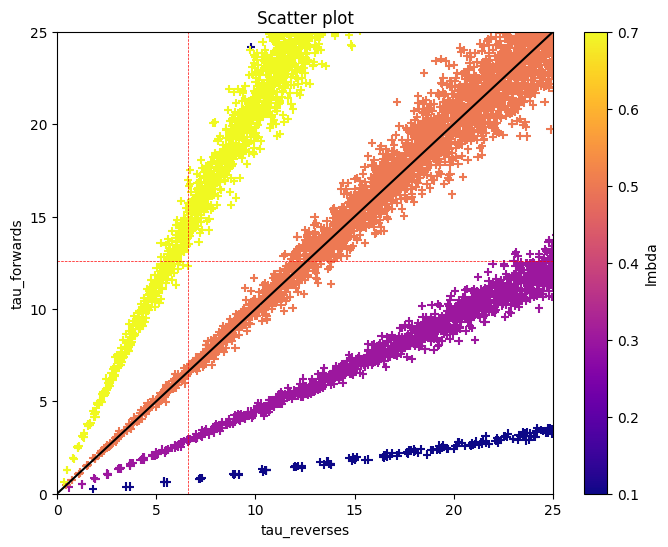

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df_pl_tau["tau_reverses"],
    df_pl_tau["tau_forwards"],
    c=df_pl_tau["lmbda"],
    cmap="plasma",
    marker="+"
)
plt.colorbar(sc, label="lmbda")
plt.axhline(y=12.6, c="r", lw=0.5, ls="--")
plt.axvline(x=6.6, c="r", lw=0.5, ls="--")
plt.ylabel("tau_forwards")
plt.xlabel("tau_reverses")
plt.xlim([0, 200])
plt.ylim([0, 200])
plt.title("Scatter plot")
plt.plot(np.arange(0,200,1), np.arange(0,200,1), c="k")
plt.show()


# recopier ici pour zoomer
plt.figure(figsize=(8,6))
sc = plt.scatter(
    df_pl_tau["tau_reverses"],
    df_pl_tau["tau_forwards"],
    c=df_pl_tau["lmbda"],
    cmap="plasma",
    marker="+"
)
plt.colorbar(sc, label="lmbda")
plt.axhline(y=12.6, c="r", lw=0.5, ls="--")
plt.axvline(x=6.6, c="r", lw=0.5, ls="--")
plt.ylabel("tau_forwards")
plt.xlabel("tau_reverses")
plt.xlim([0, 25])
plt.ylim([0, 25])
plt.title("Scatter plot")
plt.plot(np.arange(0,200,1), np.arange(0,200,1), c="k")
plt.show()

Tau linéaire: [0.5        0.51515152 0.53030303 0.54545455 0.56060606 0.57575758
 0.59090909 0.60606061 0.62121212 0.63636364 0.65151515 0.66666667
 0.68181818 0.6969697  0.71212121 0.72727273 0.74242424 0.75757576
 0.77272727 0.78787879 0.8030303  0.81818182 0.83333333 0.84848485
 0.86363636 0.87878788 0.89393939 0.90909091 0.92424242 0.93939394
 0.95454545 0.96969697 0.98484848 1.         1.01515152 1.03030303
 1.04545455 1.06060606 1.07575758 1.09090909 1.10606061 1.12121212
 1.13636364 1.15151515 1.16666667 1.18181818 1.1969697  1.21212121
 1.22727273 1.24242424 1.25757576 1.27272727 1.28787879 1.3030303
 1.31818182 1.33333333 1.34848485 1.36363636 1.37878788 1.39393939
 1.40909091 1.42424242 1.43939394 1.45454545 1.46969697 1.48484848
 1.5        1.51515152 1.53030303 1.54545455 1.56060606 1.57575758
 1.59090909 1.60606061 1.62121212 1.63636364 1.65151515 1.66666667
 1.68181818 1.6969697  1.71212121 1.72727273 1.74242424 1.75757576
 1.77272727 1.78787879 1.8030303  1.81818182 1.83

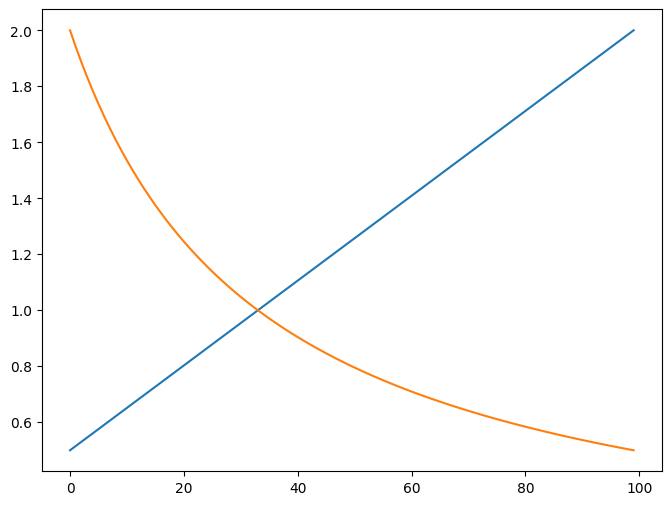

In [87]:
import numpy as np

tau_min = 0.5
tau_max = 2.0
n_points = 100

# Construis tau linéaire
tau_linear = np.linspace(tau_min, tau_max, n_points)

# En déduis r
r_for_linear_tau = 1 / tau_linear

print("Tau linéaire:", tau_linear)
print("r à utiliser:", r_for_linear_tau)

plt.figure(figsize=(8,6))
plt.plot(tau_linear)
plt.plot(r_for_linear_tau)
plt.show()

In [90]:
# PSMN

# marcand.py : 70_000
# en 8 heures : 4_000
# temps estimé :
t_psmn = 70_000 * 8 / 4_000 / 24
print(t_psmn)

# Compter donc 6 jours : 22 juillet 00:00 par là

5.833333333333333


# .